# Practical Project  - Arthur Rodrigues S. Quadros & João Pedro Torres & Sarah Luiza S. Magalhães

**University:** Pontifical Catholic University of Minas Gerais

**Course:** Computer Science

**Subject:** Performance Modeling and Evaluation

**Professor:** Diego Silva Caldeira Rocha

**Theme:** Utilizing k-means and creating our own heuristic for it with a dataset containing the longitude and the latitute for every brazilian city. The objective of this project is to clusterize all cities of Minas Gerais for a number of landfills in the state. Our heuristic is explained in more details in the article.

The original dataset is available [here](https://github.com/kelvins/Municipios-Brasileiros).

To run this notebook, either change the way to get the dataset or configure the file_path variable to the path in your google drive in which contains the source file.

## Important Geografical Info

Biggest cities in Minas Gerais (in terms of population): [tre-mg-jus](https://www.tre-mg.jus.br/comunicacao/noticias/2020/Agosto/nove-municipios-mineiros-poderao-ter-segundo-turno-nas-eleicoes-2020)

General geografical info: [mg.gov.br](https://www.mg.gov.br/pagina/geografia)

General statistical info: [IBGE](https://cidades.ibge.gov.br/brasil/mg/panorama)

# Imports and basic configurations

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import random
import math

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change the path after 'drive/Myrive/'

file_path = "drive/MyDrive/catholic/MAD/tp/"

In [ ]:
raw_df = pd.read_csv(f"{file_path}municipios.csv", sep=",")
raw_df.head(5)

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


# Data handling

In [ ]:
df = raw_df.copy()

print("Total Length of DataFrame:", len(df))

df.head(5)

Total Length of DataFrame: 5570


,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


In [ ]:
df = df.loc[df["codigo_uf"] == 31] # get only Minas Gerais data
print(df.head(5))

cols_to_drop = [
    "capital",
    "nome",
    "siafi_id",
    "ddd",
    "fuso_horario",
    "codigo_ibge",
    "codigo_uf"
]

df = df.drop(cols_to_drop, axis=1) # keep only longitude and latitude for clustering

df.head(5)

    codigo_ibge                 nome  latitude  longitude  capital  codigo_uf  \
1       3100104  Abadia dos Dourados  -18.4831   -47.3916        0         31   
3       3100203               Abaeté  -19.1551   -45.4444        0         31   
12      3100302           Abre Campo  -20.2996   -42.4743        0         31   
15      3100401              Acaiaca  -20.3590   -43.1439        0         31   
29      3100500              Açucena  -19.0671   -42.5419        0         31   

    siafi_id  ddd       fuso_horario  
1       4001   34  America/Sao_Paulo  
3       4003   37  America/Sao_Paulo  
12      4005   31  America/Sao_Paulo  
15      4007   31  America/Sao_Paulo  
29      4009   33  America/Sao_Paulo  


,latitude,longitude
1,-18.4831,-47.3916
3,-19.1551,-45.4444
12,-20.2996,-42.4743
15,-20.3590,-43.1439
29,-19.0671,-42.5419


In [ ]:
print("Total Length of DataFrame after filter:", len(df)) # 853 cities in Minas Gerais

Total Length of DataFrame after filter: 853


In [ ]:
cols_to_drop = [
    "ConcatUF+Mun", "IBGE",
    "Unnamed: 9", "IBGE7",
    "Região", "Capital",
    "UF"
]

pop_df = pd.read_csv(f"{file_path}pop_cidade.csv", sep=";")
pop_df = pop_df.loc[pop_df["UF"] == "MG"]

print("------------ Main cities size ------------")

print("BELO HORIZONTE size:", pop_df.loc[pop_df["Município"] == "Belo Horizonte"]["Porte"], end="\n\n")
print("UBERLÂNDIA size:", pop_df.loc[pop_df["Município"] == "Uberlândia"]["Porte"], end="\n\n")
print("CONTAGEM size:", pop_df.loc[pop_df["Município"] == "Contagem"]["Porte"], end="\n\n")
print("JUIZ DE FORA size:", pop_df.loc[pop_df["Município"] == "Juiz de Fora"]["Porte"], end="\n\n")
print("MONTES CLAROS size:", pop_df.loc[pop_df["Município"] == "Montes Claros"]["Porte"], end="\n\n")
print("BETIM size:", pop_df.loc[pop_df["Município"] == "Betim"]["Porte"], end="\n\n")
print("UBERABA size:", pop_df.loc[pop_df["Município"] == "Uberaba"]["Porte"], end="\n\n")
print("RIBEIRÃO DAS NEVES size:", pop_df.loc[pop_df["Município"] == "Ribeirão Das Neves"]["Porte"], end="\n\n")
print("GOVERNADOR VALADARES size:", pop_df.loc[pop_df["Município"] == "Governador Valadares"]["Porte"], end="\n\n")

pop_df = pop_df.drop(cols_to_drop, axis=1)
pop_df.head(5)

------------ Main cities porte ------------
BELO HORIZONTE porte: 2309    Metrópole
Name: Porte, dtype: object

UBERLÂNDIA porte: 3067    Grande
Name: Porte, dtype: object

CONTAGEM porte: 2448    Grande
Name: Porte, dtype: object

JUIZ DE FORA porte: 2663    Grande
Name: Porte, dtype: object

MONTES CLAROS porte: 2743    Grande
Name: Porte, dtype: object

BETIM porte: 2315    Grande
Name: Porte, dtype: object

UBERABA porte: 3066    Grande
Name: Porte, dtype: object

RIBEIRÃO DAS NEVES porte: 2880    Grande
Name: Porte, dtype: object

GOVERNADOR VALADARES porte: 2558    Grande
Name: Porte, dtype: object



,Município,População 2010,Porte
2244,Abadia Dos Dourados,6704.0,Pequeno I
2245,Abaeté,22690.0,Pequeno II
2246,Abre Campo,13311.0,Pequeno I
2247,Acaiaca,3920.0,Pequeno I
2248,Açucena,10276.0,Pequeno I


In [ ]:
df["size_weight"] = 0

print(pop_df["Porte"].unique())

values = {
    "Pequeno I": 50,
    "Pequeno II": 50,
    "Médio": 300,
    "Grande": 700,
    "Metrópole": 2800,
}

# 30, 30, 250, 500, 1500 -> good
# 50, 50, 300, 700, 2800 -> good


for i, j in enumerate(df.index):
  df["porte"][j] = values[pop_df["Porte"].values[i]]

df.head(5)

['Pequeno I' 'Pequeno II' 'Médio' 'Grande' 'Metrópole']


<ipython-input-15-c3045e16f9c3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["porte"][j] = values[pop_df["Porte"].values[i]]


,latitude,longitude,porte
1,-18.4831,-47.3916,50
3,-19.1551,-45.4444,50
12,-20.2996,-42.4743,50
15,-20.3590,-43.1439,50
29,-19.0671,-42.5419,50


# First Implementation

## Basic tests and understanding of the algorithm

Simple tests with SSE being used as quality metric for all possibities of n_clusters from 1 to 400.

In [ ]:
l = np.array([i for i in range(1, 401)])
i = 400
errors = np.ndarray(shape=(400,))

print("This may take a while...")

for i in l:
  score = KMeans(n_init=1, n_clusters=i, random_state=5).fit(df).score(df)
  errors[i - 1] = (score * -1)
  # print(f"i = {i}", score) # the score returns (- (SSE for all clusters))

This may take a while...


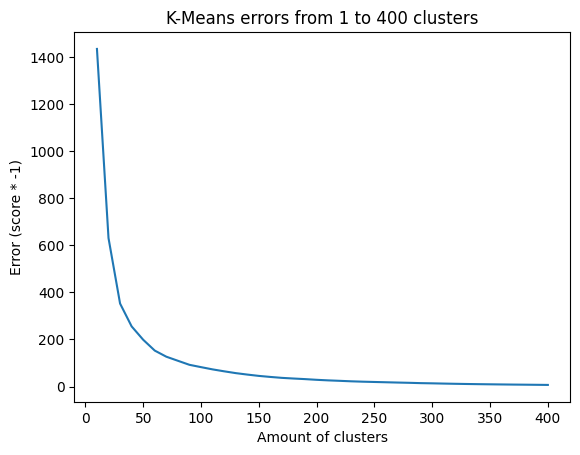

In [ ]:
plt.title("K-Means errors from 1 to 400 clusters")

plt.xlabel("Amount of clusters")
plt.ylabel("Error (score * -1)")

plt.plot(tuple([c2 for c1, c2 in enumerate(l) if (c1 + 1) % 10 == 0]),
         tuple([error for c, error in enumerate(errors) if (c + 1) % 10 == 0]))

plt.show()

In [ ]:
c1 = 1
for c2 in l:
  if c1 % 10 == 0:
    print(f"clusters: {c1} | error: {errors[c2 - 1]}")
  c1 += 1

clusters: 10 | error: 1434.0239435414408
clusters: 20 | error: 630.548078524144
clusters: 30 | error: 352.5366232306293
clusters: 40 | error: 255.44466172644434
clusters: 50 | error: 198.67153772252874
clusters: 60 | error: 152.66812002513
clusters: 70 | error: 126.72838927453412
clusters: 80 | error: 109.41976630707492
clusters: 90 | error: 92.25588991210944
clusters: 100 | error: 82.4119879608835
clusters: 110 | error: 72.86056565493236
clusters: 120 | error: 64.66106747265664
clusters: 130 | error: 56.99922290471583
clusters: 140 | error: 50.81028405757915
clusters: 150 | error: 45.185689780139654
clusters: 160 | error: 40.75672628457067
clusters: 170 | error: 36.79782230013315
clusters: 180 | error: 34.01861321430968
clusters: 190 | error: 31.50351626734257
clusters: 200 | error: 28.541565436080106
clusters: 210 | error: 26.15070197064702
clusters: 220 | error: 24.22207807711046
clusters: 230 | error: 22.16729277820327
clusters: 240 | error: 20.586659861167902
clusters: 250 | error

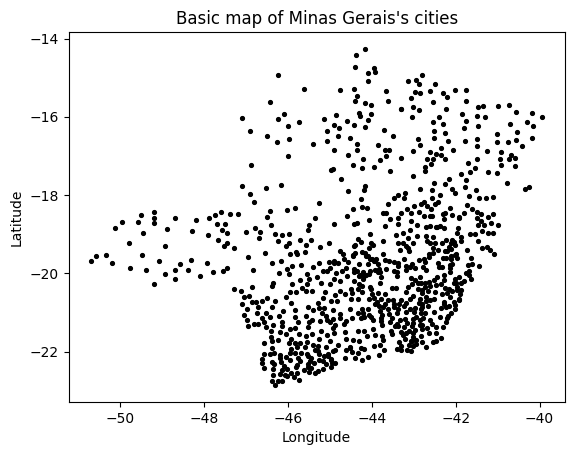

In [ ]:
# longitude -> distance to prime meridian (Greenwich) = X
# latitude -> distance to equator line = Y

# initial map of Minas Gerais

plt.title("Basic map of Minas Gerais's cities")

plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(
   df["longitude"], df["latitude"],
   c='black', marker='.',
   edgecolor='black', s=30
)

# plt.show() clears everything plotted before
# after this plt.show(), you can call multiple plt.scatter or any other type of graph
# and they will overlap, creating more complex graphs

plt.show() # plot simple graph

## Definitive tests

Sum of Squared Error (SSE): [ 43.92895115  42.71306435  65.99929015  54.23917587  66.41225933
  48.67867447  45.19302251  50.66880591   0.          40.77598313
  32.21115466  26.06951874  59.07359839 290.67322523  43.25801412]
J: 909.8947380075028

Y is the cluster for all 853 cities.

Y type: <class 'numpy.ndarray'>
Y length: 853
Y dimentions: (853,)



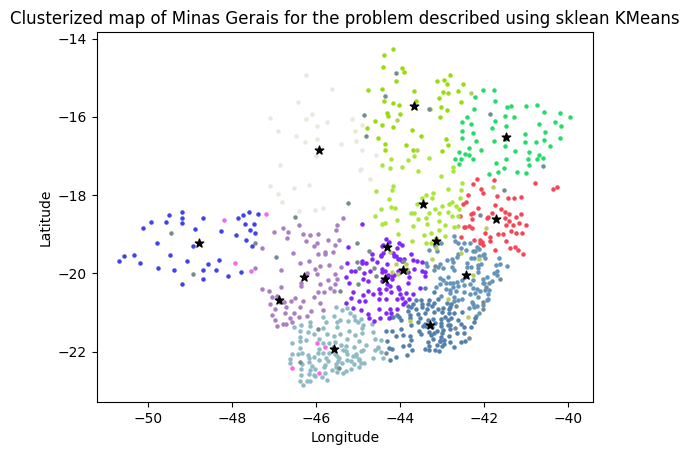

In [ ]:
# default parameters for heuristics comparison with Sklearn KMeans

n_clusters = 15
n_init = 50
max_iter = 5000
tol = 1e-5
random_state = 5
init="random"

X = np.ndarray(shape=(len(df), 3)) # ndarray to get clusterwise SSE

for i in range(len(df.index)):
  X[i][0] = df["latitude"].values[i]
  X[i][1] = df["longitude"].values[i]
  X[i][2] = df["size_weight"].values[i]

definitive_model = KMeans(
    n_clusters=n_clusters, init=init,
    n_init=n_init, max_iter=max_iter,
    tol=tol, random_state=random_state,
).fit(X)


cluster_centers = [X[definitive_model.labels_ == i].mean(axis=0) for i in range(n_clusters)] # get all centers

clusterwise_sse = ([0] * n_clusters) # start list with len(n_clusters) with all zeros
for point, label in zip(X, definitive_model.labels_):
    clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum() # calculate clusterwise SSE

# get total SSE

j = 0
for i in clusterwise_sse:
  j += i

# print mathematical metrics

print("Sum of Squared Error (SSE):", np.array(clusterwise_sse))
print("J:", j)
print()

# get clusters for each city

y = definitive_model.predict(X)

print("Y is the cluster for all 853 cities.\n")
print("Y type:", type(y))
print("Y length:", len(y))
print("Y dimentions:", y.shape)
print()

# plot clusterized map

color_by_cluster = {
    0: "#ece7de", 1: "#6595bb",
    2: "#a981c2", 3: "#25dc6a",
    4: "#8fbbc6", 5: "#4043e9",
    6: "#5381ac", 7: "#8326fb",
    8: "#a3ba79", 9: "#9adb0c",
    10: "#f64655", 11: "#fa66e9",
    12: "#b8cf5b", 13: "#758d8e",
    14: "#a9e637"
}
clusters_symbol = "."

center_color, center_symbol = "#000000", "*" # black star

plt.title("Clusterized map of Minas Gerais for the problem described using sklean KMeans")

plt.xlabel("Longitude")
plt.ylabel("Latitude")

for i in range(n_clusters):
  plt.scatter(
    df.iloc[y == i, :]["longitude"], # X
    df.iloc[y == i, :]["latitude"],  # Y
    c=color_by_cluster[i], marker=clusters_symbol,
    edgecolor=color_by_cluster[i], s=20
  )

for i in range(n_clusters):
  plt.scatter(
    definitive_model.cluster_centers_[i][1], # X
    definitive_model.cluster_centers_[i][0], # Y
    c=center_color, marker=center_symbol,
    edgecolor=center_color, s=40
  )

plt.show()

Seeing the positions (x, y) for each cluster center and comparing with the population map by region, we can see this is a viable solution to the problem considering the population of Minas Gerais.

![picture](https://www.mg.gov.br/sites/default/files/agendamento_servicos/mapa.jpg)